# Classification: Iris dataset

Also included in scikit-learn is the well-known Iris dataset.

## Load and inspect the data

In [1]:
# the usual imports
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

The data are botanical features ...

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

... for 3 species of Iris flower:

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [5]:
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

Again, for better inspection, we build a pandas DataFrame:

In [6]:
df = pd.DataFrame(X, columns = iris.feature_names)
df['target'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Let's look at the intercorrelations of the features.

In [7]:
df[iris.feature_names].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


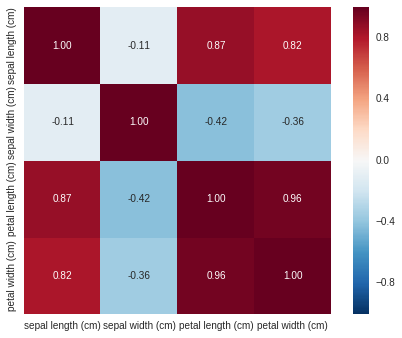

In [8]:
import seaborn as sns
plt.figure()
coefs = np.corrcoef(df[iris.feature_names].values.T)
sns.set(style='whitegrid')
hm = sns.heatmap(coefs, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=df[iris.feature_names].columns, xticklabels=df[iris.feature_names].columns) 
plt.show()
sns.reset_orig()

Overall the predictors are very much correlated. For classification, we will choose just two features, namely the uncorrelated sepal_width and sepal_length.

In [9]:
X = X[:,:2]

## Cross validation

Normally we would split the data into training and test sets. In this case, as we don't have enough data to meaningfully do that, we will use cross validation to average over iteratively performed train-test splits.

## Logistic Regression

Let's first use logistic regression on the data set.

In [10]:
from sklearn import linear_model
from sklearn.cross_validation import StratifiedKFold
skf = StratifiedKFold(y = y, n_folds = 10)
accuracies_train = []
accuracies_test = []

for train_index, test_index in skf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logistic_model = linear_model.LogisticRegression()
    logistic_model.fit(X_train, y_train)
    accuracies_train.append(logistic_model.score(X_train, y_train))
    accuracies_test.append(logistic_model.score(X_test, y_test))

print 'training accuracies: {}\n'.format(map(lambda x: round(x,2), accuracies_train))
print 'average training accuracy: {}\n'.format(round(np.mean(accuracies_train),2))
print 'test accuracies: {}\n'.format(map(lambda x: round(x,2), accuracies_test))
print 'average test accuracy: {}\n'.format(round(np.mean(accuracies_test),2))

training accuracies: [0.79, 0.76, 0.78, 0.77, 0.79, 0.79, 0.76, 0.77, 0.77, 0.75]

average training accuracy: 0.77

test accuracies: [0.73, 0.8, 0.67, 0.8, 0.6, 0.73, 0.8, 0.8, 0.8, 0.87]

average test accuracy: 0.76



Let's inspect the predictions from the last of these models:

In [11]:
y_predicted = logistic_model.predict(X)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2])

In [12]:
y_predicted == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [13]:
# from https://github.com/rasbt/python-machine-learning-book
from matplotlib.colors import ListedColormap
def plot_decision_regions(title, X, y, classifier, resolution=0.02):

    plt.figure()
    plt.title(title)
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('cyan', 'red', 'orange', 'gray', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    plt.show()    


Let's inspect the decision boundaries of the logistic regression model (again, looking at the last one from above, as they behaved very similarly):

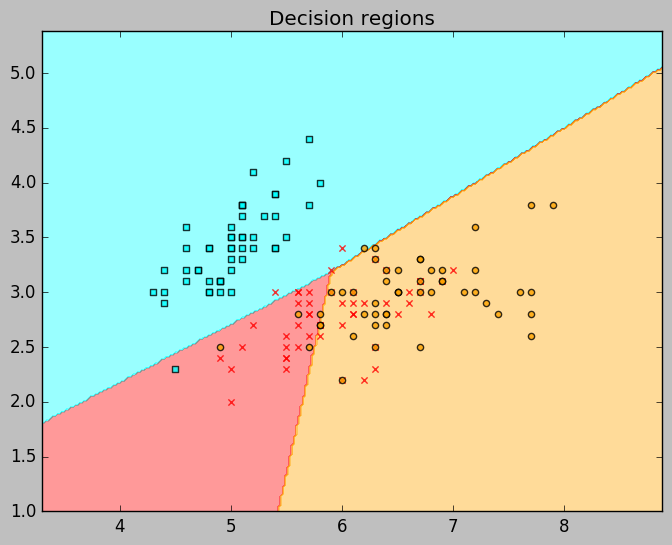

In [14]:
plot_decision_regions('Decision regions', X, y, logistic_model)

We see that one class is correctly identified in general, while the other two are not linearly separable. 
We can confirm this by looking at the confusion matrix: 

In [15]:
from sklearn import metrics
metrics.confusion_matrix(y, logistic_model.predict(X))

array([[49,  1,  0],
       [ 3, 22, 25],
       [ 1,  6, 43]])

## Support Vector Machine

Next, let's try a nonlinear classifier: a support vector machine (with the scikit-learn default RBF kernel).

In [17]:
from sklearn import svm
skf = StratifiedKFold(y = y, n_folds = 10)
accuracies_train = []
accuracies_test = []

for train_index, test_index in skf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc_model = svm.SVC(kernel='poly')
    svc_model.fit(X_train, y_train)
    accuracies_train.append(svc_model.score(X_train, y_train))
    accuracies_test.append(svc_model.score(X_test, y_test))

print 'training accuracies: {}\n'.format(map(lambda x: round(x,2), accuracies_train))
print 'average training accuracy: {}\n'.format(round(np.mean(accuracies_train),2))
print 'test accuracies: {}\n'.format(map(lambda x: round(x,2), accuracies_test))
print 'average test accuracy: {}\n'.format(round(np.mean(accuracies_test),2))


training accuracies: [0.84, 0.83, 0.79, 0.81, 0.83, 0.84, 0.81, 0.82, 0.8, 0.8]

average training accuracy: 0.82

test accuracies: [0.67, 0.8, 0.8, 0.87, 0.8, 0.67, 0.87, 0.8, 0.93, 0.8]

average test accuracy: 0.8



We see SVM performs better than logistic regression on both test and training sets.
How do its decision boundaries look?

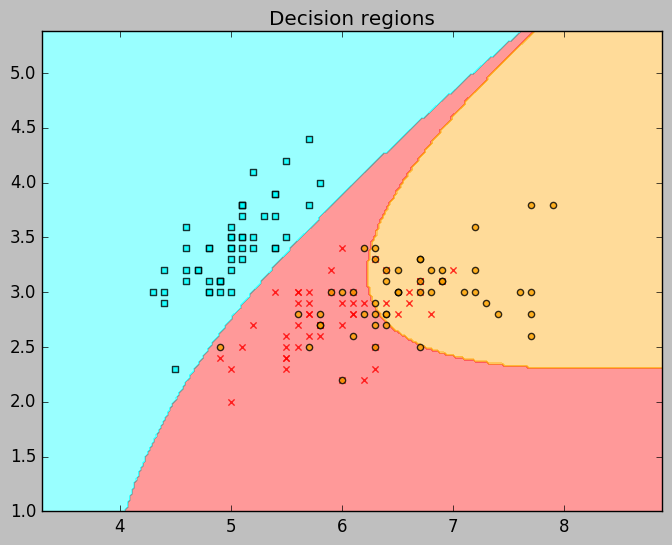

In [18]:
plot_decision_regions('Decision regions', X, y, svc_model)

Again, look at the confusion matrix:

In [ ]:
metrics.confusion_matrix(y, svc_model.predict(X))

# Decision Tree

Next, try another nonlinear classifier, decision tree.

In [ ]:
from sklearn import tree
skf = StratifiedKFold(y = y, n_folds = 10)
accuracies_train = []
accuracies_test = []

for train_index, test_index in skf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    tree_model = tree.DecisionTreeClassifier()
    tree_model.fit(X_train, y_train)
    accuracies_train.append(tree_model.score(X_train, y_train))
    accuracies_test.append(tree_model.score(X_test, y_test))

print 'training accuracies: {}\n'.format(map(lambda x: round(x,2), accuracies_train))
print 'average training accuracy: {}\n'.format(round(np.mean(accuracies_train),2))
print 'test accuracies: {}\n'.format(map(lambda x: round(x,2), accuracies_test))
print 'average test accuracy: {}\n'.format(round(np.mean(accuracies_test),2))


Accuracy on test set is much lower than on training set. The tree is clearly overfitted.
We can confirm this looking at the decision boundaries:

In [ ]:
plot_decision_regions('Decision regions', X, y, tree_model)

Let's see how many nodes the tree has (for 150 data points!)

In [ ]:
tree_model.tree_.node_count

## Decision Tree - constrained

We now build another tree, restricted to having not fewer than 5 samples at every leaf.
How does it perform, and how do the decision boundaries look?

In [ ]:
skf = StratifiedKFold(y = y, n_folds = 10)
accuracies_train = []
accuracies_test = []

for train_index, test_index in skf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    tree_model = tree.DecisionTreeClassifier(min_samples_leaf = 5)
    tree_model.fit(X_train, y_train)
    accuracies_train.append(tree_model.score(X_train, y_train))
    accuracies_test.append(tree_model.score(X_test, y_test))

print 'training accuracies: {}\n'.format(map(lambda x: round(x,2), accuracies_train))
print 'average training accuracy: {}\n'.format(round(np.mean(accuracies_train),2))
print 'test accuracies: {}\n'.format(map(lambda x: round(x,2), accuracies_test))
print 'average test accuracy: {}\n'.format(round(np.mean(accuracies_test),2))

plot_decision_regions('Decision regions', X, y, tree_model)

# Gradient Boosting Tree

Finally, let's try boosting, using scikit-learn's GradientBoostingClassifier:

In [ ]:
from sklearn import ensemble
skf = StratifiedKFold(y = y, n_folds = 10)
accuracies_train = []
accuracies_test = []

for train_index, test_index in skf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gb_model = ensemble.GradientBoostingClassifier(n_estimators=200)
    gb_model.fit(X_train, y_train)
    accuracies_train.append(gb_model.score(X_train, y_train))
    accuracies_test.append(gb_model.score(X_test, y_test))

print 'training accuracies: {}\n'.format(map(lambda x: round(x,2), accuracies_train))
print 'average training accuracy: {}\n'.format(round(np.mean(accuracies_train),2))
print 'test accuracies: {}\n'.format(map(lambda x: round(x,2), accuracies_test))
print 'average test accuracy: {}\n'.format(round(np.mean(accuracies_test),2))

plot_decision_regions('Decision regions', X, y, gb_model)

Interestingly, the ensemble looks overfitted, but test error is not as bad as in the case of the unconstrained decision tree.